In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from skgarden import RandomForestQuantileRegressor
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be remo

In [2]:
currency_btc_df = pd.read_csv('./Data/final_currency_df.csv', index_col = 'Date')

In [3]:
currency_btc_df.head()

,BTC_Price,BTC_Volume,USD/CNY_Price,USD/CNY_PCT_CHANGE,USD/EUR_Price,USD/EUR_PCT_CHANGE,USD/JPY_Price,USD/JPY_PCT_CHANGE
Date,,,,,,,,
2017-01-13,823.984009,168968000,6.9005,0.13,0.9395,-0.30,114.53,-0.17
2017-01-14,818.411987,93063296,6.9005,0.00,0.9395,0.00,114.53,0.00
2017-01-15,821.797974,71013600,6.9005,0.00,0.9395,0.00,114.53,0.00
2017-01-16,831.533997,82755200,6.9009,0.01,0.9432,0.39,114.20,-0.29
2017-01-17,907.937988,155095008,6.8546,-0.67,0.9334,-1.04,112.64,-1.37


In [4]:
currency_btc_df['BTC_Previous_Day_Close'] = currency_btc_df['BTC_Price'].shift(1)

In [5]:
currency_btc_df = currency_btc_df.dropna()

In [6]:
currency_btc_df.head()

,BTC_Price,BTC_Volume,USD/CNY_Price,USD/CNY_PCT_CHANGE,USD/EUR_Price,USD/EUR_PCT_CHANGE,USD/JPY_Price,USD/JPY_PCT_CHANGE,BTC_Previous_Day_Close
Date,,,,,,,,,
2017-01-14,818.411987,93063296,6.9005,0.00,0.9395,0.00,114.53,0.00,823.984009
2017-01-15,821.797974,71013600,6.9005,0.00,0.9395,0.00,114.53,0.00,818.411987
2017-01-16,831.533997,82755200,6.9009,0.01,0.9432,0.39,114.20,-0.29,821.797974
2017-01-17,907.937988,155095008,6.8546,-0.67,0.9334,-1.04,112.64,-1.37,831.533997
2017-01-18,886.617981,225676992,6.8390,-0.23,0.9406,0.77,114.67,1.80,907.937988


In [7]:
X = currency_btc_df.drop(columns = 'BTC_Price')

In [8]:
y = currency_btc_df['BTC_Price']

In [9]:
len(X)

1095

In [10]:
len(y)

1095

In [44]:
training_X = X[:1080]

In [19]:
training_X

,BTC_Volume,USD/CNY_Price,USD/CNY_PCT_CHANGE,USD/EUR_Price,USD/EUR_PCT_CHANGE,USD/JPY_Price,USD/JPY_PCT_CHANGE,BTC_Previous_Day_Close
Date,,,,,,,,
2017-01-14,93063296,6.9005,0.00,0.9395,0.00,114.53,0.00,823.984009
2017-01-15,71013600,6.9005,0.00,0.9395,0.00,114.53,0.00,818.411987
2017-01-16,82755200,6.9009,0.01,0.9432,0.39,114.20,-0.29,821.797974
2017-01-17,155095008,6.8546,-0.67,0.9334,-1.04,112.64,-1.37,831.533997
2017-01-18,225676992,6.8390,-0.23,0.9406,0.77,114.67,1.80,907.937988
...,...,...,...,...,...,...,...,...
2020-01-05,19725074094,6.9655,0.00,0.8959,0.00,108.09,0.00,7410.656738
2020-01-06,23276261598,6.9760,0.15,0.8930,-0.32,108.38,0.27,7411.317383
2020-01-07,28767291326,6.9452,-0.44,0.8965,0.39,108.44,0.06,7769.219238


In [45]:
training_y = y[:1080]

In [46]:
training_y.tail()

Date
2019-12-25    7275.155762
2019-12-26    7238.966797
2019-12-27    7290.088379
2019-12-28    7317.990234
2019-12-29    7422.652832
Name: BTC_Price, dtype: float64

In [47]:
testing_X = X[1080:]

In [48]:
testing_X.head()

,BTC_Volume,USD/CNY_Price,USD/CNY_PCT_CHANGE,USD/EUR_Price,USD/EUR_PCT_CHANGE,USD/JPY_Price,USD/JPY_PCT_CHANGE,BTC_Previous_Day_Close
Date,,,,,,,,
2019-12-30,22874131671,6.9867,-0.13,0.8930,-0.20,108.88,-0.49,7422.652832
2019-12-31,21167946112,6.9632,-0.34,0.8919,-0.12,108.62,-0.24,7292.995117
2020-01-01,18565664996,6.9632,0.00,0.8919,0.00,108.70,0.07,7193.599121
2020-01-02,20802083465,6.9643,0.02,0.8950,0.35,108.58,-0.11,7200.174316
2020-01-03,28111481031,6.9655,0.02,0.8959,0.10,108.09,-0.45,6985.470215


In [49]:
testing_y = y[1080:]

In [50]:
testing_y.head()

Date
2019-12-30    7292.995117
2019-12-31    7193.599121
2020-01-01    7200.174316
2020-01-02    6985.470215
2020-01-03    7344.884277
Name: BTC_Price, dtype: float64

In [51]:
regressor = RandomForestQuantileRegressor(random_state = 0, n_estimators = 500)

In [52]:
model = regressor.fit(training_X, training_y)

In [53]:
model.score(training_X, training_y)

0.9982153130966176

In [54]:
model.score(testing_X, testing_y)

0.6783797416304844

In [55]:
print(model.feature_importances_)

[1.77463039e-03 2.41770039e-03 7.18816303e-04 4.96970570e-03
 8.82988990e-04 4.21621560e-03 1.20418107e-03 9.83815762e-01]


In [56]:
predictions = model.predict(testing_X)

In [57]:
predictions_df = pd.DataFrame(predictions)

In [58]:
upper = model.predict(testing_X, quantile = 98.5)

In [59]:
lower = model.predict(testing_X, quantile = 2.5)

In [60]:
predictions_df.head()

,0
0,7320.158898
1,7274.786218
2,7263.122067
3,7315.329376
4,7258.373429


In [61]:
actuals = pd.DataFrame(testing_y)

In [62]:
actuals.head()

,BTC_Price
Date,
2019-12-30,7292.995117
2019-12-31,7193.599121
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277


In [63]:
actuals_vs_predictions = actuals.copy()

In [64]:
actuals_vs_predictions['Predictions'] = predictions

In [65]:
actuals_vs_predictions['Upper'] = upper

In [66]:
actuals_vs_predictions['Lower'] = lower

In [67]:
actuals_vs_predictions.head()

,BTC_Price,Predictions,Upper,Lower
Date,,,,
2019-12-30,7292.995117,7320.158898,7804.180762,6861.175872
2019-12-31,7193.599121,7274.786218,7554.019908,6774.552284
2020-01-01,7200.174316,7263.122067,7538.566168,6932.480469
2020-01-02,6985.470215,7315.329376,7764.364343,6965.331975
2020-01-03,7344.884277,7258.373429,8342.380448,6625.885328


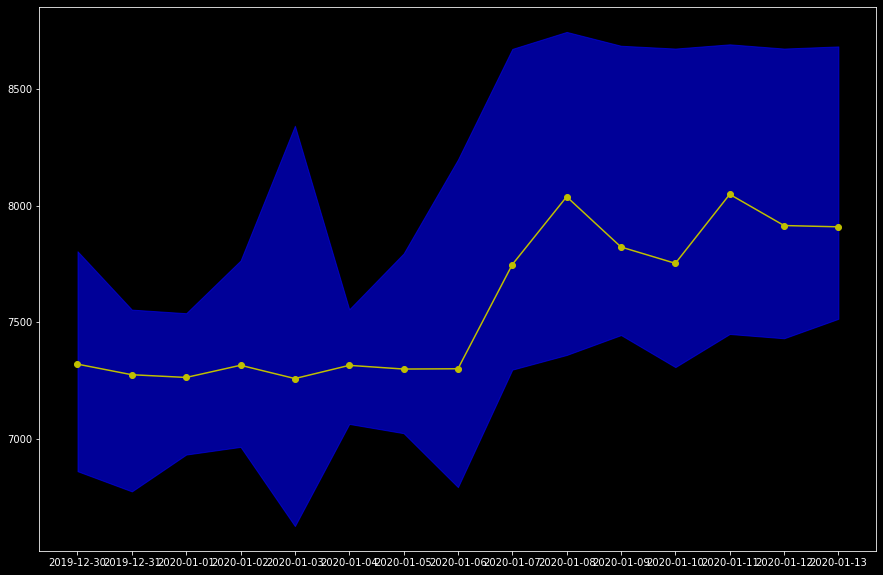

In [68]:
plt.style.use('dark_background')
fig = plt.figure(figsize = (15,10))
plt.plot(actuals_vs_predictions['Predictions'], marker = 'o', color = 'y')
plt.fill_between(actuals_vs_predictions.index, actuals_vs_predictions['Upper'], actuals_vs_predictions['Lower'], color = 'b', alpha = 0.6)
plt.xticks(actuals_vs_predictions.index)
plt.show()
